In [8]:
### ---- Import Libraries ---- ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.colors as col

In [10]:
### ---- Read Data Files ---- ###

# Read in training data csv file and check head
r_Train = pd.read_csv("trainingData.csv", sep=",")
r_Validate = pd.read_csv("validationData.csv", sep=",")

FileNotFoundError: [Errno 2] File trainingData.csv does not exist: 'trainingData.csv'

In [ ]:
### ---- Select / Filter Buildings using Loc function ---- ###
#Min = 0, max = 2

building_0 = r_Train.loc[r_Train['BUILDINGID'] == 0]
building_1 = r_Train.loc[r_Train['BUILDINGID'] == 1]
building_2 = r_Train.loc[r_Train['BUILDINGID'] == 2]


building_0_val = r_Validate.loc[r_Validate['BUILDINGID'] == 0]
building_1_val = r_Validate.loc[r_Validate['BUILDINGID'] == 1]
building_2_val = r_Validate.loc[r_Validate['BUILDINGID'] == 2]

In [4]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_0, marker = "o", label = "B_0") # Can specify which floors using operators
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_1, marker = "s", label = "B_1")
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_2, marker = "o", label = "B_2")
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Buildings by Longitude and Latitude")

NameError: name 'building_0' is not defined

In [5]:
building_0['FLOOR'].value_counts()

NameError: name 'building_0' is not defined

In [6]:
#building_0['FLOOR'].describe()

In [7]:
## Let's run an aggregate function on entire dataframe
building_0.median()
building_0.var()
building_0.max()
building_0.describe()

NameError: name 'building_0' is not defined

In [19]:
b0 = building_0.drop_duplicates()

print("Dataframe without Duplicates:\n\n", b0.head(2))

Dataframe without Duplicates:

       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
4        100     100     100     100     100     100     100     100     100   
7119     100     100     100     100     100     100     100     100     100   

      WAP010  ...  WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  \
4        100  ...     100 -7632.1436  4.864982e+06      0           0   
7119     100  ...     100 -7637.2570  4.864950e+06      0           0   

      SPACEID  RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
4         122                 2      11       13  1369909710  
7119      102                 2      11       13  1369908951  

[2 rows x 529 columns]


In [20]:
b0_val = building_0_val.drop_duplicates()
print("Dataframe without Duplicates:\n\n", b0_val.head(2))

Dataframe without Duplicates:

     WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
4      100     100     100     100     100     100     100     100     100   
21     100     100     100     100     100     100     100     100     100   

    WAP010  ...  WAP520    LONGITUDE      LATITUDE  FLOOR  BUILDINGID  \
4      100  ...     100 -7641.499303  4.864922e+06      2           0   
21     100  ...     100 -7586.944816  4.864986e+06      1           0   

    SPACEID  RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
4         0                 0       0        2  1380877774  
21        0                 0       0       13  1379580019  

[2 rows x 529 columns]


In [23]:
## Make a copy of the de duplicated data sets and check shape and columns

c_Train = b0.copy(); 
c_Train.columns
c_Train.shape 

(5246, 529)

In [24]:
## Make a copy of the de duplicated data sets and check shape and columns

c_Val = b0_val.copy();
c_Val.columns
c_Val.shape

(536, 529)

In [25]:
## Here I am changing the data type of the column names from Index to List

wap_names = c_Train.columns[0:520].tolist()
wap_names_val = c_Val.columns[0:520].tolist()

In [35]:
var_0_filter = c_Train.loc[c_Train.loc[:,wap_names].var(axis=1) == 0,:]

In [36]:
var_1_filter = c_Train.loc[c_Train.loc[:,wap_names].var(axis=1) != 0,:]

In [37]:
var_0_filter_val = c_Val.loc[c_Val.loc[:,wap_names].var(axis=1) == 0,:]

In [38]:
var_1_filter_val = c_Val.loc[c_Val.loc[:,wap_names].var(axis=1) != 0,:]

In [48]:
## Rename the main dataframe for simplicity

v1 = var_1_filter.copy()

In [109]:
## Subsetting the data we need into two data frames
# DF 1 shows all columns non wap

v1_waps = v1.iloc[:,0:520]

In [211]:
## Subsetting the data we need into two data frames
# DF 2 shows all columns non wap
v1_notwaps = v1.iloc[:, 520:529]

In [229]:
v1_notwaps.columns

Index(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object')

In [152]:
## Doing a precheck on values before normalising the WAPs by row 
v1_waps.max()
v1_waps.min()

WAP001    -97
WAP002    -90
WAP003    100
WAP004    100
WAP005    100
         ... 
WAP516    100
WAP517    100
WAP518    100
WAP519    -97
WAP520    100
Length: 520, dtype: int64

In [200]:
## Attempting to normalise the dataframe using a lamda function - unsuccessful, returns NaN values

#v1_norm1 = v1_norm[wap_names].apply(lambda v: (v - v1_norm[wap_names].min()) / v1_norm[wap_names].max() - v1_norm[wap_names].min())

In [191]:
## Using Scikitlearn to perform normalisation 
# Alternative 2: Min Max Scaler

#from sklearn.preprocessing import MinMaxScaler
#data = v1_waps
#scaler = MinMaxScaler()
#print(scaler.fit(data))
#print(scaler.transform(data))
#data.describe()

In [202]:
## Using Scikitlearn to perform normalisation 
# Alternative 1

from sklearn.preprocessing import Normalizer
X = v1_waps.iloc[:,0:520]
transformer = Normalizer().fit(X) # fit does nothing in this case
transformer
transformer.transform(X)

array([[0.04401686, 0.04401686, 0.04401686, ..., 0.04401686, 0.04401686,
        0.04401686],
       [0.044031  , 0.044031  , 0.044031  , ..., 0.044031  , 0.044031  ,
        0.044031  ],
       [0.04412554, 0.04412554, 0.04412554, ..., 0.04412554, 0.04412554,
        0.04412554],
       ...,
       [0.04414657, 0.04414657, 0.04414657, ..., 0.04414657, 0.04414657,
        0.04414657],
       [0.04421392, 0.04421392, 0.04421392, ..., 0.04421392, 0.04421392,
        0.04421392],
       [0.04426973, 0.04426973, 0.04426973, ..., 0.04426973, 0.04426973,
        0.04426973]])

In [228]:
#X.columns
#X.shape

In [227]:
## Turn the normalised X array into a DataFrame

X_df = pd.DataFrame(X)
#X_df.describe()

In [195]:
## Quick check on shape to two dataframes before rejoining

In [220]:
#X_df.shape

In [221]:
#v1_notwaps.shape

In [222]:
## Merge the normalised X array and remaining columns into a DataFrame

merged_df = pd.merge(X_df, v1_notwaps, left_index = True, right_index = True)

In [223]:
normed_df = merged_df.copy()

In [224]:
#normed_df.columns

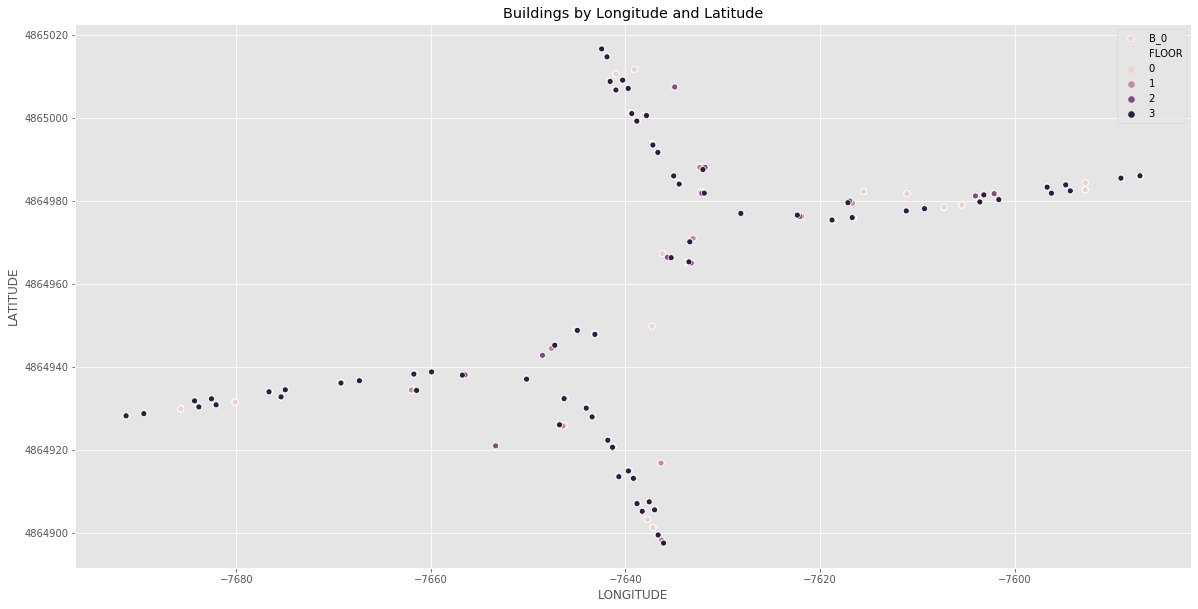

In [226]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

## Using the normalised and merged dataframe
plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=normed_df, hue = "FLOOR", marker = "o", label = "B_0") # Can specify which floors using operators
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Buildings by Longitude and Latitude")
plt.savefig("Normalised LONG LAT.png")

In [ ]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

## Start making selections by User and Phone ID

In [234]:
## Create some new dataframe groupings for Users, Phones and Combination

user_group = normed_df.groupby(["USERID"]).count()
phone_group = normed_df.groupby(["PHONEID"]).count()
phone_user_group = normed_df.groupby(["PHONEID", "USERID"]).count()

In [257]:
## Let's filter the WAPs by User
normed_df['USERID']

7119     11
7120     11
7121     11
7122     11
7123     11
         ..
18492     1
18493     1
18494     1
18496     1
18497     1
Name: USERID, Length: 5245, dtype: int64

In [258]:
normed_df['PHONEID']

7119     13
7120     13
7121     13
7122     13
7123     13
         ..
18492    14
18493    14
18494    14
18496    14
18497    14
Name: PHONEID, Length: 5245, dtype: int64

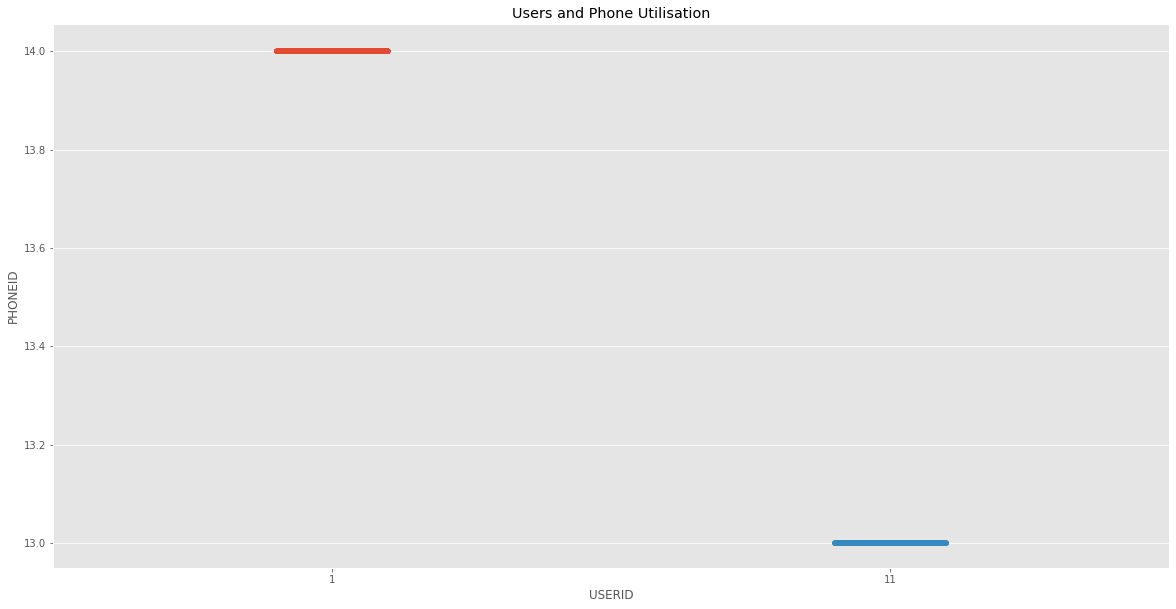

In [259]:
## Plot to get an idea of how the phones and the users are distributed

x = normed_df['USERID'].copy()
y = normed_df['PHONEID'].copy()

sns.stripplot(x, y, data = normed_df)
plt.title("Users and Phone Utilisation")
plt.savefig("User by Phone B2 LONG.png")

In [279]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES  ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = (normed_df.iloc[:, 0:520]) # Independent variable
y = (normed_df.loc[:, "FLOOR"]) #  Target column
#X.shape
#y.shape

In [280]:
#### ----  GENERIC MODEL PREPROCESSING ---- ###

## TRAIN TEST SPLIT

## Splitting into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [281]:
#### ---- ERROR METRICS FOR REGRESSION ---- ####

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [282]:
#### ----  REGRESSION 1: GRADIENT BOOSTED TREES ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.ensemble import GradientBoostingRegressor

## Fitting Linear Regression to the Training Set
gbt_reg = GradientBoostingRegressor()
gbt_reg.fit(X_train, y_train)


## Predicting the Test set results
y_pred = gbt_reg.predict(X_test)

In [283]:
## Assigning error metrics

mse_gbt = round(mean_squared_error(y_test, y_pred), 4)
rmse_gbt = round(np.sqrt(mse_gbt), 4)
mae_gbt = round(mean_absolute_error(y_test, y_pred), 4)
r2_gbt = round(r2_score(y_test, y_pred), 4)

In [284]:
## Printing out errors in DataFrame format

model_name = "Gradient Boosted Trees"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
    f"-----------------------------------------------------\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse_gbt,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse_gbt,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae_gbt,
      "\n\n", f"The Correlation (r2) is:\n",r2_gbt,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Gradient Boosted Trees 

-----------------------------------------------------

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 0.0641 

 The Root Mean Squared Error (RMSE) is:
 0.2532 

 The Mean Absolute Error (MAE) is:
 0.189 

 The Correlation (r2) is:
 0.9452 

 -----------------------------------------------------



In [285]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual



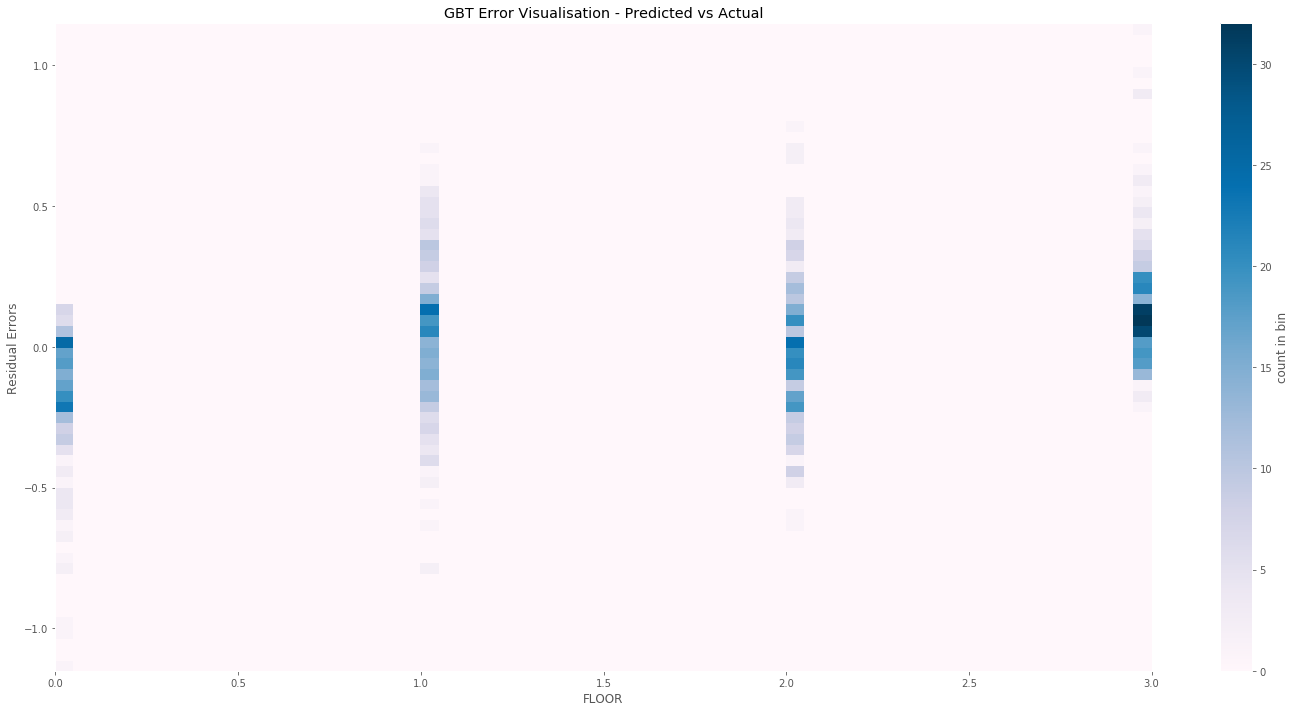

In [286]:
#### ---- ERROR VISUALISATION: PLOTTING RESIDUALS - DENSITY - TWO DIMENSIONAL HISTOGRAM ---- ####

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=60, cmap='PuBu')
plt.colorbar(label='count in bin')

plt.title("GBT Error Visualisation - Predicted vs Actual")
plt.xlabel("FLOOR")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.tight_layout()
plt.grid(True) ## Adds grid lines

plt.savefig("GBT Error Plt B0 floor.png")

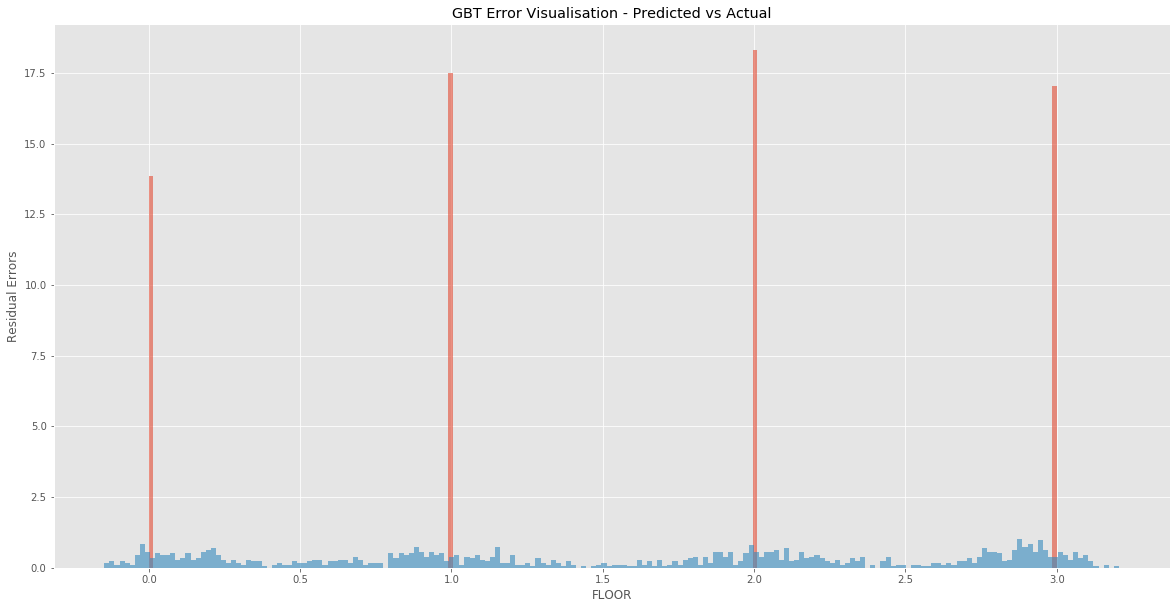

In [274]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###

x1 = y_test
x2 = y_pred
#x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.6, bins=200)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("GBT Error Visualisation - Predicted vs Actual")
plt.xlabel("FLOOR")
plt.ylabel("Residual Errors")


plt.savefig("GBT Error Hist Building 0 - Floor.png")

In [ ]:
## Let's restart the modelling with classification

In [310]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES FOR BUILDING 2 ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = normed_df.iloc[:, 0:520] # WAP columns
y = normed_df.loc[:, "FLOOR"] # Floor Target column


In [311]:
### Here I am moving over to Classification Modelling

#### ---- ERROR METRICS FOR CLASSIFICATION ---- ####

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import f1_score

In [312]:
#### ----  MODEL ITERATION 1: LOGISTIC REGRESSION ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.linear_model import LogisticRegression

## Apply Fit mathod to training data

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = log_reg.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [314]:
cm_log = confusion_matrix(y_test, y_pred)
acc_log = round(accuracy_score(y_test, y_pred), 4)
prec_log = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_log = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_log = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [315]:
model_name = "Logistic Regression"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_log, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_log,
      "\n\n", f"Precision is:\n",prec_log,
      "\n\n", f"Recall is:\n",recall_log,
      "\n\n", f"Cohen's Kappa is:\n", kappa_log,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Logistic Regression 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1      205       12        1        0
Floor 2       17      251        7        0
Floor 3        0        2      273       13
Floor 4        0        0       23      245 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9285 

 Precision is:
 0.9294 

 Recall is:
 0.9285 

 Cohen's Kappa is:
 0.9043 

-----------------------------------------------------



In [351]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x    LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                    
10376        1 -7594.264100  4.864982e+06        1            1   True
16789        3 -7640.289600  4.865009e+06        3            3   True
9042         2 -7587.102300  4.864986e+06        2            2   True
18033        1 -7639.715400  4.865007e+06        1            1   True
8643         3 -7635.040800  4.864986e+06        3            2  False
...        ...          ...           ...      ...          ...    ...
10490        3 -7639.180100  4.864913e+06        3            3   True
8571         2 -7634.934136  4.865008e+06        2            2   True
16376        1 -7640.289600  4.865009e+06        1            1   True
16883        0 -7616.556000  4.864976e+06        0            0   True
7696         2 -7639.715400  4.865007e+06        2            2   True

[1049 rows x 6 colu

Text(0.5, 1.0, 'Error Visualisation - Building 0 Floor Prediction Errors')

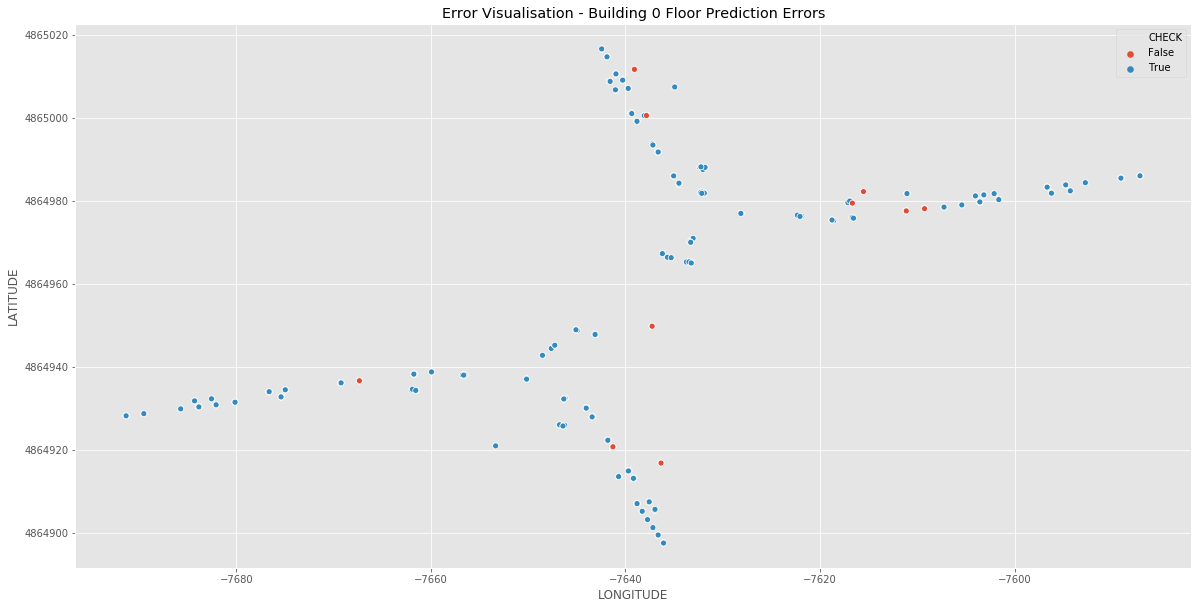

In [352]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 0 Floor Prediction Errors")

In [354]:
#### ----  MODEL ITERATION 2: DECISION TREE ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.tree import DecisionTreeClassifier

## Apply Fit mathod to training data

clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 42)
clf.fit(X_train, y_train)

## Predicting the test set results
y_pred = clf.predict(X_test)

In [355]:
cm_dt = confusion_matrix(y_test, y_pred)
acc_dt = round(accuracy_score(y_test, y_pred), 4)
prec_dt = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_dt = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_dt = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [356]:
model_name = "Decision Tree"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_dt, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_dt,
      "\n\n", f"Precision is:\n",prec_dt,
      "\n\n", f"Recall is:\n",recall_dt,
      "\n\n", f"Cohen's Kappa is:\n", kappa_dt,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Decision Tree 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1      210        8        0        0
Floor 2        4      263        7        1
Floor 3        2        9      272        5
Floor 4        0        0        9      259 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9571 

 Precision is:
 0.9573 

 Recall is:
 0.9571 

 Cohen's Kappa is:
 0.9426 

-----------------------------------------------------



In [357]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x    LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                    
10376        1 -7594.264100  4.864982e+06        1            1   True
16789        3 -7640.289600  4.865009e+06        3            3   True
9042         2 -7587.102300  4.864986e+06        2            2   True
18033        1 -7639.715400  4.865007e+06        1            1   True
8643         3 -7635.040800  4.864986e+06        3            3   True
...        ...          ...           ...      ...          ...    ...
10490        3 -7639.180100  4.864913e+06        3            3   True
8571         2 -7634.934136  4.865008e+06        2            2   True
16376        1 -7640.289600  4.865009e+06        1            1   True
16883        0 -7616.556000  4.864976e+06        0            0   True
7696         2 -7639.715400  4.865007e+06        2            2   True

[1049 rows x 6 colu

Text(0.5, 1.0, 'Error Visualisation - Building 0 Floor Prediction Errors')

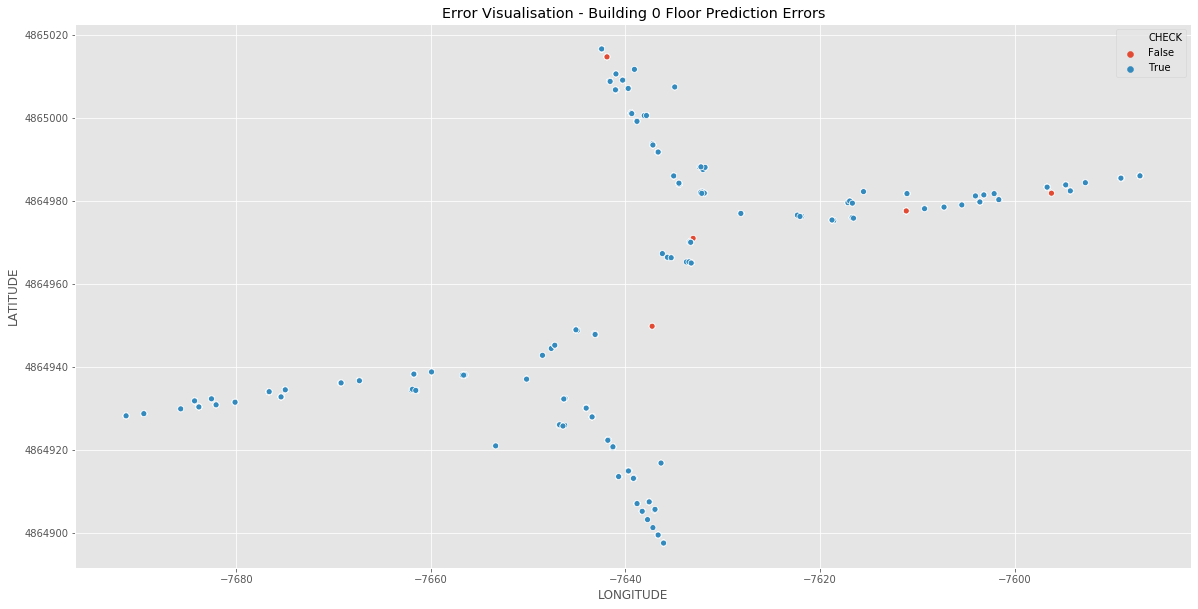

In [358]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 0 Floor Prediction Errors")

In [359]:
#### ----  MODEL ITERATION 3: K NEAREST NEIGHBOUR ---- ####

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.neighbors import KNeighborsClassifier

## Apply Fit mathod to training data

classifier = KNeighborsClassifier (n_neighbors= 5)
classifier.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = classifier.predict(X_test)

In [360]:
cm_knn = confusion_matrix(y_test, y_pred)
acc_knn = round(accuracy_score(y_test, y_pred), 4)
prec_knn = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_knn = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_knn = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [361]:
model_name = "K Nearest Neighbour"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_knn, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_knn,
      "\n\n", f"Precision is:\n",prec_knn,
      "\n\n", f"Recall is:\n",recall_knn,
      "\n\n", f"Cohen's Kappa is:\n", kappa_knn,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for K Nearest Neighbour 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1      215        3        0        0
Floor 2       16      257        2        0
Floor 3        2        4      263       19
Floor 4        0        0       10      258 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9466 

 Precision is:
 0.9475 

 Recall is:
 0.9466 

 Cohen's Kappa is:
 0.9287 

-----------------------------------------------------



In [362]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x    LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                    
10376        1 -7594.264100  4.864982e+06        1            2  False
16789        3 -7640.289600  4.865009e+06        3            3   True
9042         2 -7587.102300  4.864986e+06        2            2   True
18033        1 -7639.715400  4.865007e+06        1            1   True
8643         3 -7635.040800  4.864986e+06        3            2  False
...        ...          ...           ...      ...          ...    ...
10490        3 -7639.180100  4.864913e+06        3            3   True
8571         2 -7634.934136  4.865008e+06        2            3  False
16376        1 -7640.289600  4.865009e+06        1            1   True
16883        0 -7616.556000  4.864976e+06        0            0   True
7696         2 -7639.715400  4.865007e+06        2            2   True

[1049 rows x 6 colu

Text(0.5, 1.0, 'Error Visualisation - Building 0 Floor Prediction Errors')

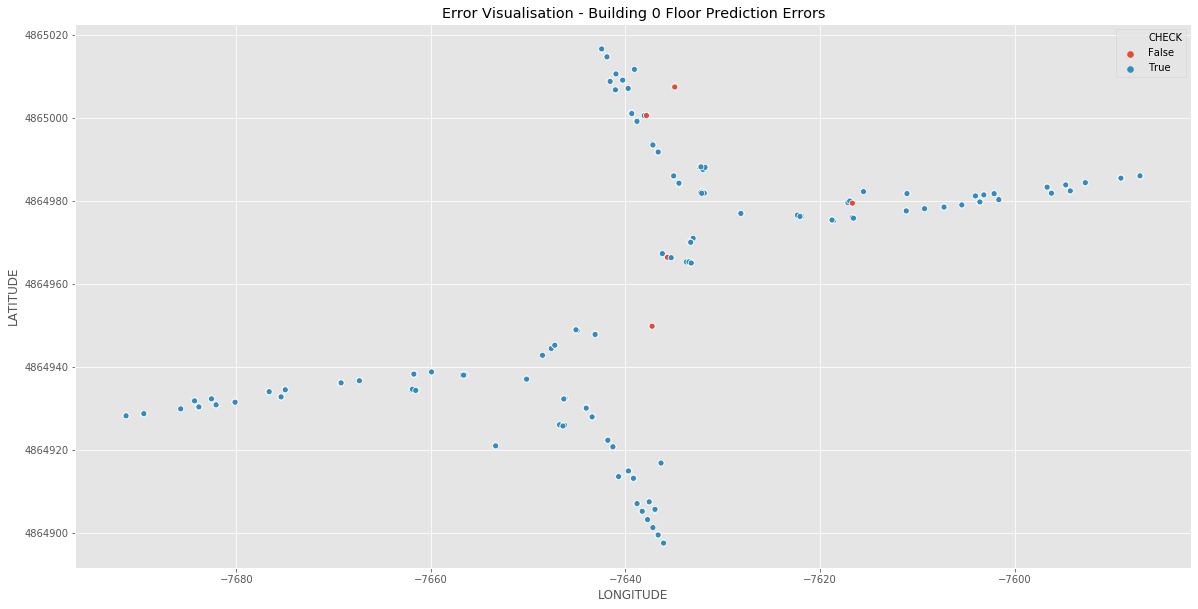

In [363]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 0 Floor Prediction Errors")

In [364]:
#### ----  MODEL ITERATION 4: RANDOM FOREST PART 2 RF ---- ####

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Apply Fit mathod to training data

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = rf_clf.predict(X_test)

In [365]:
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = round(accuracy_score(y_test, y_pred), 4)
prec_rf = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_rf = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [366]:
model_name = "Random Forest"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_rf, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_rf,
      "\n\n", f"Precision is:\n",prec_rf,
      "\n\n", f"Recall is:\n",recall_rf,
      "\n\n", f"Cohen's Kappa is:\n", kappa_rf,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Random Forest 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1      215        3        0        0
Floor 2        0      275        0        0
Floor 3        0        0      288        0
Floor 4        0        0        0      268 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9971 

 Precision is:
 0.9972 

 Recall is:
 0.9971 

 Cohen's Kappa is:
 0.9962 

-----------------------------------------------------



In [367]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x    LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                    
10376        1 -7594.264100  4.864982e+06        1            1   True
16789        3 -7640.289600  4.865009e+06        3            3   True
9042         2 -7587.102300  4.864986e+06        2            2   True
18033        1 -7639.715400  4.865007e+06        1            1   True
8643         3 -7635.040800  4.864986e+06        3            3   True
...        ...          ...           ...      ...          ...    ...
10490        3 -7639.180100  4.864913e+06        3            3   True
8571         2 -7634.934136  4.865008e+06        2            2   True
16376        1 -7640.289600  4.865009e+06        1            1   True
16883        0 -7616.556000  4.864976e+06        0            0   True
7696         2 -7639.715400  4.865007e+06        2            2   True

[1049 rows x 6 colu

Text(0.5, 1.0, 'Error Visualisation - Building 0 Floor Prediction Errors')

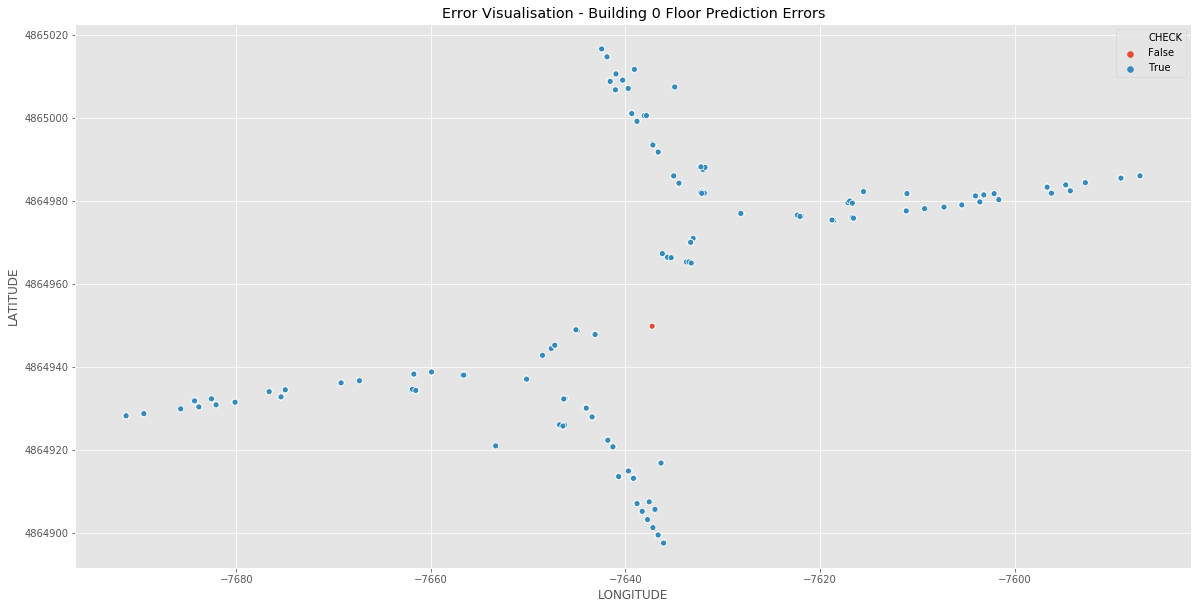

In [368]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 0 Floor Prediction Errors")

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = round(accuracy_score(y_test, y_pred), 4)
prec_rf = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_rf = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [389]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES ERROR WISE COLUMNS---- ####

error_df = pd.DataFrame(
    { #"Confusion Matrix" : [cm_log, cm_dt, cm_knn, cm_rf],
      "Accuracy" : [acc_log, acc_dt, acc_knn, acc_rf],
      "Precision" : [prec_log, prec_dt, prec_knn, prec_rf],
      "Recall" : [recall_log, recall_dt, recall_knn, recall_rf],
      "Cohen's Kapa" : [kappa_log, kappa_dt, kappa_knn, kappa_rf]},
     index = ["Log", "DT", "KNN", "RF"])

error_df

,Accuracy,Precision,Recall,Cohen's Kapa
Log,0.9285,0.9294,0.9285,0.9043
DT,0.9571,0.9573,0.9571,0.9426
KNN,0.9466,0.9475,0.9466,0.9287
RF,0.9971,0.9972,0.9971,0.9962


In [390]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES ERROR WISE COLUMNS---- ####

error_df_flat = pd.DataFrame(
    { "Logistic Regression" : [acc_log, prec_log, recall_log, kappa_log],
      "Decision Tree" : [acc_dt, prec_dt, recall_dt, kappa_dt],
      "K Nearest Neighbour" : [acc_knn, prec_knn, recall_knn, kappa_knn],
      "Random Forest" : [acc_rf, prec_rf, recall_rf, kappa_rf]},
     index = ["Accuracy", "Precision", "Recall", "Kappa"])

error_df_flat

,Logistic Regression,Decision Tree,K Nearest Neighbour,Random Forest
Accuracy,0.9285,0.9571,0.9466,0.9971
Precision,0.9294,0.9573,0.9475,0.9972
Recall,0.9285,0.9571,0.9466,0.9971
Kappa,0.9043,0.9426,0.9287,0.9962
